In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/sentimenta analysis ml - Sheet1.csv')


In [5]:
df.head(2),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   Age group                                                                         25 non-null     object
 1   Gender
                                                                           25 non-null     object
 2   Have you watched DRISHYAM?                                                        25 non-null     object
 3   How would you rate the movie overall?                                             25 non-null     int64 
 4   What emotion did you mostly feel while watching Drishyam?                         25 non-null     object
 5   Which category best describes your final sentiment after the movie?               25 non-null     object
 6   How did you f

(    Age group           Gender\n Have you watched DRISHYAM?  \
 0  35 & above  Prefer not to say                        yes   
 1       18-25               Male                        yes   
 
    How would you rate the movie overall?  \
 0                                      5   
 1                                      4   
 
   What emotion did you mostly feel while watching Drishyam?  \
 0                                           Suspense          
 1                                           Suspense          
 
   Which category best describes your final sentiment after the movie?  \
 0                                           Positive                    
 1                                           Positive                    
 
   How did you feel about the ending?(short answers like: happy, sad, shocking etc)  
 0                                         Crazy end                                 
 1                                              Happy                          

In [6]:
df_clean = df[[
    "How did you feel about the ending?(short answers like: happy, sad, shocking etc)",
    "Which category best describes your final sentiment after the movie?"
]].rename(columns={
    "How did you feel about the ending?(short answers like: happy, sad, shocking etc)": "Ending_Feeling",
    "Which category best describes your final sentiment after the movie?": "Sentiment"
})


In [7]:
X = df_clean["Ending_Feeling"]
y = df_clean["Sentiment"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [9]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



In [10]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)


MultinomialNB()

In [11]:
y_pred = nb.predict(X_test_vec)

In [13]:
acc = accuracy_score(y_test, y_pred)


In [14]:
acc

0.8571428571428571

In [15]:
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

(report, cm)

('              precision    recall  f1-score   support\n\n       Mixed       0.50      1.00      0.67         1\n     Neutral       1.00      0.67      0.80         3\n    Positive       1.00      1.00      1.00         3\n\n    accuracy                           0.86         7\n   macro avg       0.83      0.89      0.82         7\nweighted avg       0.93      0.86      0.87         7\n',
 array([[1, 0, 0],
        [1, 2, 0],
        [0, 0, 3]]))

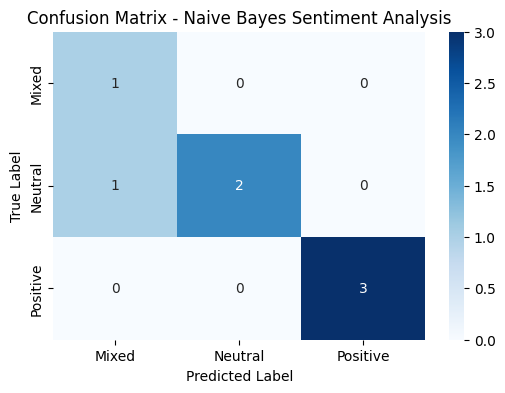

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes Sentiment Analysis")
plt.show()